In [638]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [639]:
df=pd.read_excel('data\LoanDeafaulterData1.xlsx')
df.head()

,Education,Occupation,Years in current occupation,Monthly income,Type of residence,Loan application amount,Collateral,Track record with your bank,Type of car,Status
0,Graduate,Private sector employee,4,3.4,Shared accommodation,2859,3145,No past loans,New,D
1,High School,Other professional,6,2.6,Shared accommodation,4194,4613,Erratic payment record,New,D
2,Did not finish school,Private sector employee,9,3.4,Rented,2040,2244,No past loans,Used,D
3,Graduate,Other professional,9,3.7,Shared accommodation,2267,2494,No past loans,Used,D
4,Graduate,Government employee,12,84.0,Partly-owned,2893,3182,Good payment record,Used,G


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Education                    10000 non-null  object 
 1   Occupation                   10000 non-null  object 
 2   Years in current occupation  10000 non-null  int64  
 3   Monthly income               10000 non-null  float64
 4   Type of residence            10000 non-null  object 
 5   Loan application amount      10000 non-null  int64  
 6   Collateral                   10000 non-null  int64  
 7   Track record with your bank  10000 non-null  object 
 8   Type of car                  10000 non-null  object 
 9   Status                       10000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB


In [323]:
df.shape

(10000, 10)

In [324]:
df.describe()

,Years in current occupation,Monthly income,Loan application amount,Collateral
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.435600,21.769110,2910.978100,3202.125000
std,6.318975,30.356788,1089.778401,1198.755905
min,0.000000,0.200000,1000.000000,1100.000000
25%,0.000000,1.500000,2044.750000,2249.500000
50%,6.000000,2.900000,2825.000000,3108.000000
75%,11.000000,39.250000,3774.000000,4151.000000
max,20.000000,100.000000,4999.000000,5499.000000


In [325]:
#print(df.select_dtypes(exclude='object'))
categorical_columns = df.select_dtypes(include='object')
for i in categorical_columns.columns:
    unique_values=df[i].unique()
    print(f"Unique values in {i}:{unique_values}")
    print("="*95)

Unique values in Education:['Graduate' 'High School' 'Did not finish school' 'Post graduate'
 'Graduate Technical']
Unique values in Occupation:['Private sector employee' 'Other professional' 'Government employee'
 'Self-employed' 'Retired' 'Student' 'Lawyer' 'Doctor']
Unique values in Type of residence:['Shared accommodation' 'Rented' 'Partly-owned' 'Parental' 'Owned'
 'Company flat']
Unique values in Track record with your bank:['No past loans' 'Erratic payment record' 'Good payment record']
Unique values in Type of car:['New' 'Used']
Unique values in Status:['D' 'G']


In [153]:
'''Education_cat=['Did not finish school','High School','Graduate','Graduate Technical','Post graduate']
Occupation_cat= ['Private sector employee','Other professional','Government employee','Self-employed','Retired','Student','Lawyer','Doctor']
Residence_cat = ['Shared accommodation','Rented','Partly-owned','Parental','Owned','Company flat']
Track_record_cat= ['No past loans','Erratic payment record','Good payment record']
Type_car = ['New','Used']'''

"Education_cat=['Did not finish school','High School','Graduate','Graduate Technical','Post graduate']\nOccupation_cat= ['Private sector employee','Other professional','Government employee','Self-employed','Retired','Student','Lawyer','Doctor']\nResidence_cat = ['Shared accommodation','Rented','Partly-owned','Parental','Owned','Company flat']\nTrack_record_cat= ['No past loans','Erratic payment record','Good payment record']\nType_car = ['New','Used']"

In [326]:
df.columns

Index(['Education', 'Occupation', 'Years in current occupation',
       'Monthly income', 'Type of residence', 'Loan application amount',
       'Collateral', 'Track record with your bank', 'Type of car', 'Status'],
      dtype='object')

In [640]:
df['Status']=df['Status'].replace(['G','D'],[0,1])
df.head(5)

,Education,Occupation,Years in current occupation,Monthly income,Type of residence,Loan application amount,Collateral,Track record with your bank,Type of car,Status
0,Graduate,Private sector employee,4,3.4,Shared accommodation,2859,3145,No past loans,New,1
1,High School,Other professional,6,2.6,Shared accommodation,4194,4613,Erratic payment record,New,1
2,Did not finish school,Private sector employee,9,3.4,Rented,2040,2244,No past loans,Used,1
3,Graduate,Other professional,9,3.7,Shared accommodation,2267,2494,No past loans,Used,1
4,Graduate,Government employee,12,84.0,Partly-owned,2893,3182,Good payment record,Used,0


C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\3128358899.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Status',palette='husl')


<Axes: xlabel='Status', ylabel='count'>

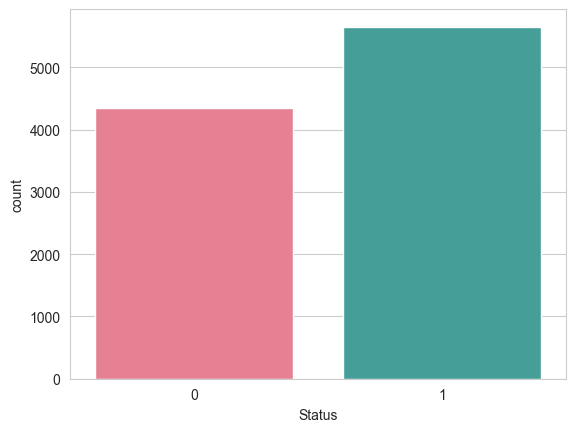

In [329]:
sns.countplot(data=df,x='Status',palette='husl')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Graduate'),
  Text(1, 0, 'High School'),
  Text(2, 0, 'Did not finish school'),
  Text(3, 0, 'Post graduate'),
  Text(4, 0, 'Graduate Technical')])

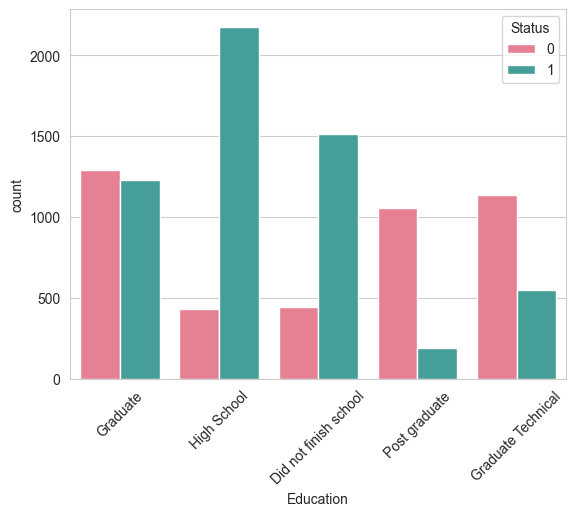

In [330]:
sns.countplot(data=df,x='Education',hue='Status',palette='husl')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Shared accommodation'),
  Text(1, 0, 'Rented'),
  Text(2, 0, 'Partly-owned'),
  Text(3, 0, 'Parental'),
  Text(4, 0, 'Owned'),
  Text(5, 0, 'Company flat')])

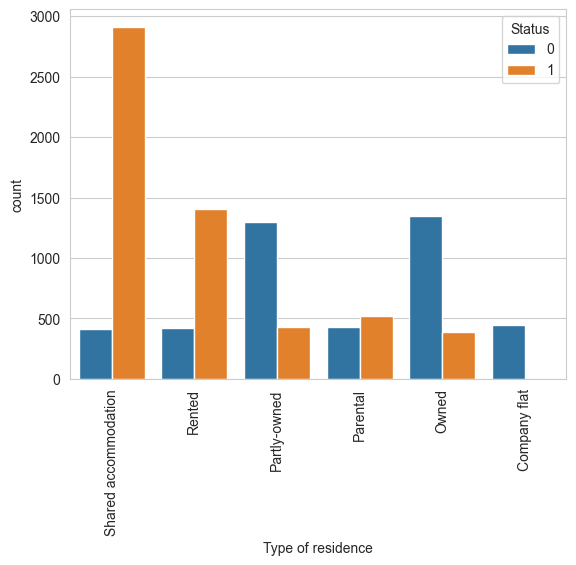

In [331]:
sns.countplot(data=df,x='Type of residence',hue='Status')
plt.xticks(rotation=90)

In [159]:
df_copy = df

In [332]:
def plot_categorical_count(feature, label_rotation=False):
    plt.figure(figsize=(10, 6))

    # Create a count plot for the categorical feature
    sns.set_style("whitegrid")
    sns.countplot(x=feature, data=df,hue='Status',palette='magma')

    # Optionally, rotate the x-axis labels for better readability
    if label_rotation:
        plt.xticks(rotation=90)

    plt.title(f'Count Plot for {feature}')
    plt.show()


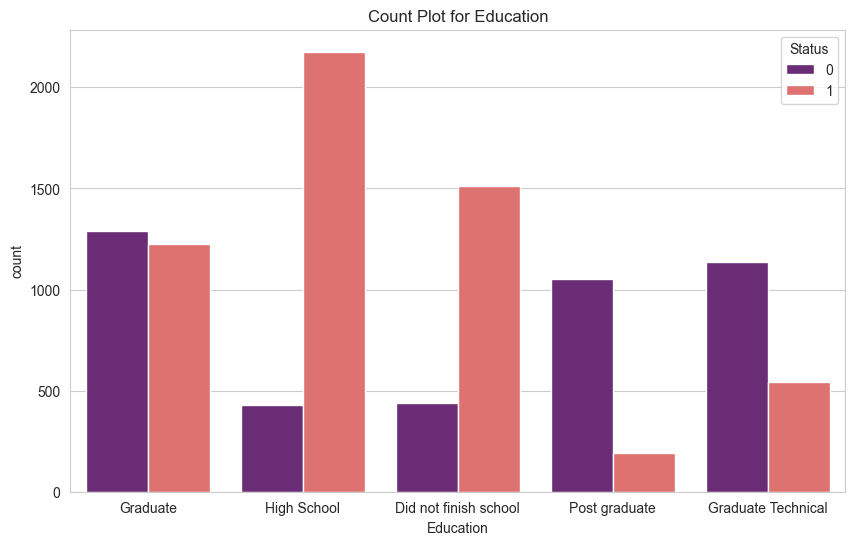

In [333]:
plot_categorical_count('Education')

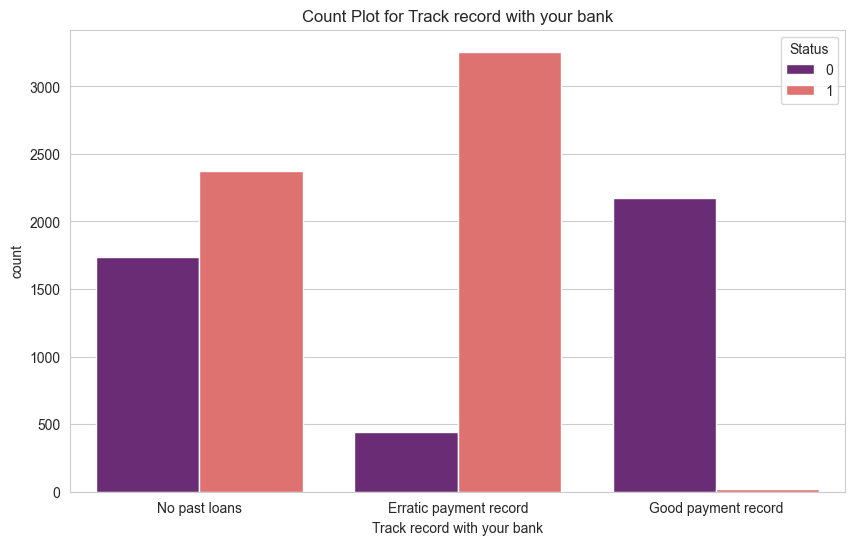

In [334]:
plot_categorical_count('Track record with your bank')

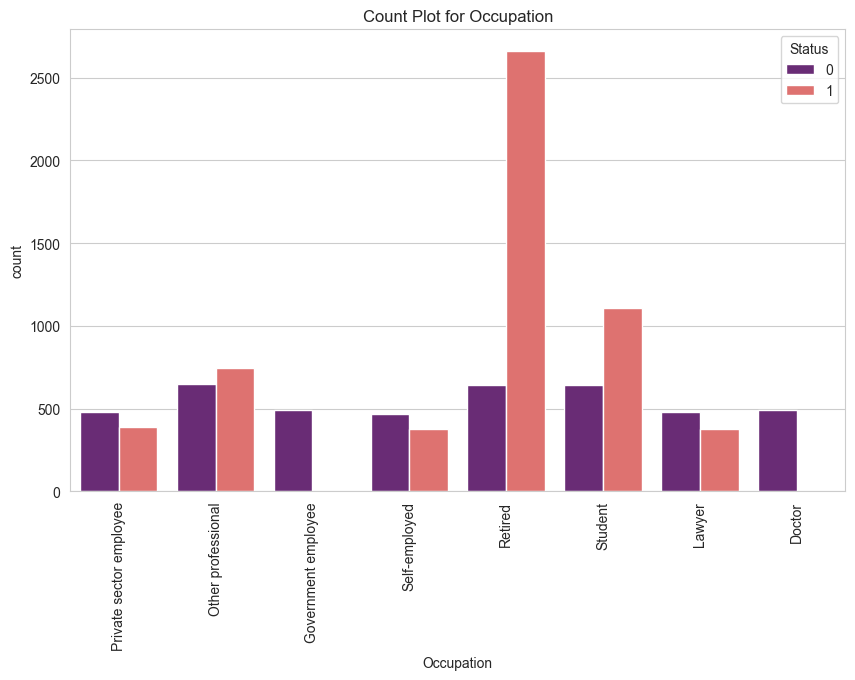

In [335]:
plot_categorical_count('Occupation',True)

C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\4226432075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status',y='Monthly income',data=df,palette='magma')


<Axes: xlabel='Status', ylabel='Monthly income'>

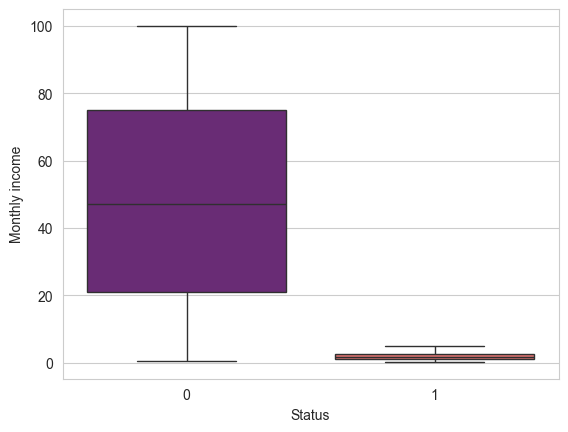

In [337]:
sns.set_style("whitegrid")
sns.boxplot(x='Status',y='Monthly income',data=df,palette='magma')

C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\545436939.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status',y='Years in current occupation',data=df_copy,palette="Set3")


<Axes: xlabel='Status', ylabel='Years in current occupation'>

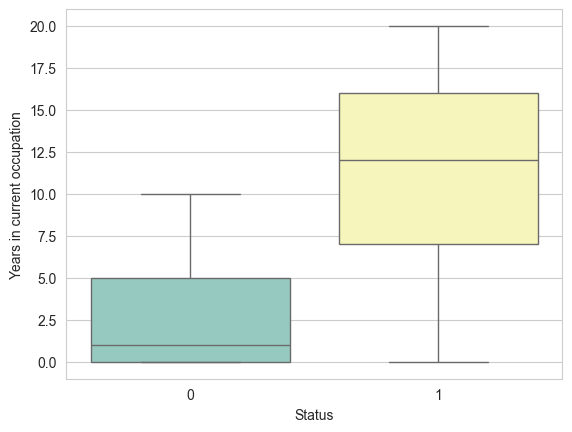

In [339]:
sns.boxplot(x='Status',y='Years in current occupation',data=df_copy,palette="Set3")

<Axes: xlabel='Status', ylabel='Loan application amount'>

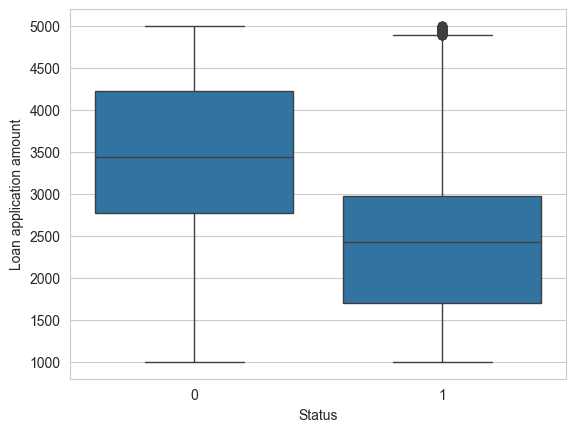

In [340]:
sns.boxplot(x='Status',y='Loan application amount',data=df)

<Axes: xlabel='Status', ylabel='Collateral'>

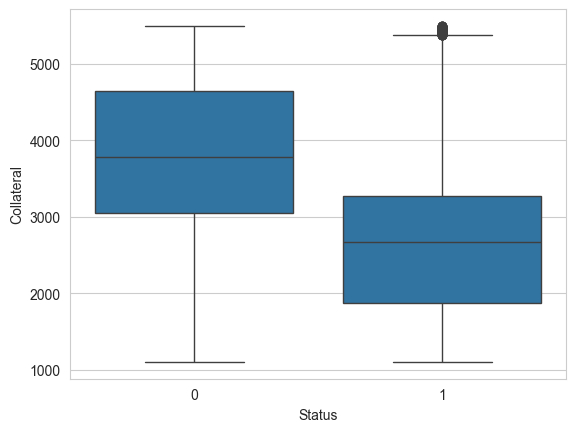

In [341]:
sns.boxplot(x='Status',y='Collateral',data=df)

In [343]:
edu=df.groupby('Education')
def_rate_by_edu=edu['Status'].mean()
def_rate_by_edu

Education
Did not finish school    0.774821
Graduate                 0.487475
Graduate Technical       0.324405
High School              0.834996
Post graduate            0.153414
Name: Status, dtype: float64

In [344]:
unique_columns = df.columns[df.nunique() == df.shape[0]].tolist()
unique_columns

[]

In [ ]:
'''fig, ax1 = plt.subplots()

ax1.set_xlabel('Education')
sns.countplot(data=df_copy,x='Education')
plt.xticks(rotation=60)
plt.show

ax2=ax1.twinx()

sns.lineplot(y='def_rate_by_edu',x='edu',data=df_copy,color='yellow')

plt.show'''

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Education                    10000 non-null  object 
 1   Occupation                   10000 non-null  object 
 2   Years in current occupation  10000 non-null  int64  
 3   Monthly income               10000 non-null  float64
 4   Type of residence            10000 non-null  object 
 5   Loan application amount      10000 non-null  int64  
 6   Collateral                   10000 non-null  int64  
 7   Track record with your bank  10000 non-null  object 
 8   Type of car                  10000 non-null  object 
 9   Status                       10000 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 781.4+ KB


In [248]:
print(df.shape[0])
print(df.shape[1])

10000
10


In [257]:
df

[]


In [ ]:
#plots
#count
#bar
#pie
#boxplot
#histplot

In [258]:
df.columns

Index(['Education', 'Occupation', 'Years in current occupation',
       'Monthly income', 'Type of residence', 'Loan application amount',
       'Collateral', 'Track record with your bank', 'Type of car', 'Status'],
      dtype='object')

In [259]:
df.head()

,Education,Occupation,Years in current occupation,Monthly income,Type of residence,Loan application amount,Collateral,Track record with your bank,Type of car,Status
0,Graduate,Private sector employee,4,3.4,Shared accommodation,2859,3145,No past loans,New,0
1,High School,Other professional,6,2.6,Shared accommodation,4194,4613,Erratic payment record,New,0
2,Did not finish school,Private sector employee,9,3.4,Rented,2040,2244,No past loans,Used,0
3,Graduate,Other professional,9,3.7,Shared accommodation,2267,2494,No past loans,Used,0
4,Graduate,Government employee,12,84.0,Partly-owned,2893,3182,Good payment record,Used,1


<Axes: xlabel='Education', ylabel='count'>

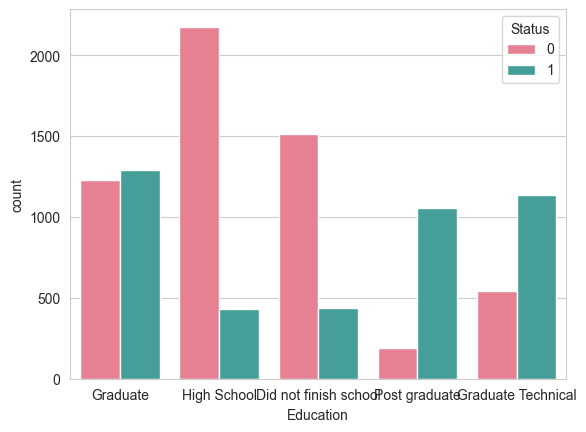

In [264]:
sns.countplot(x='Education',hue='Status' ,data=df,palette='husl')

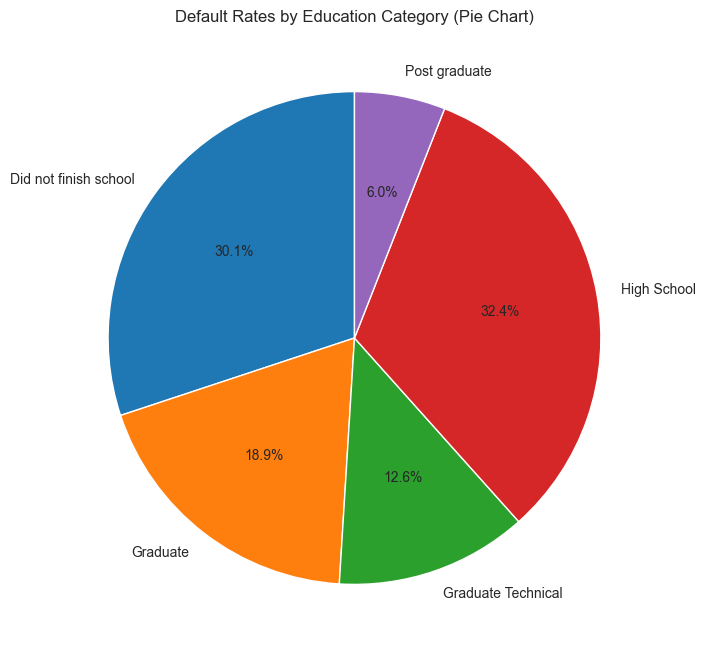

In [346]:
default_rates =df.groupby('Education')['Status'].mean().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(default_rates['Status'], labels=default_rates['Education'], autopct='%1.1f%%', startangle=90)
plt.title('Default Rates by Education Category (Pie Chart)')
plt.show()



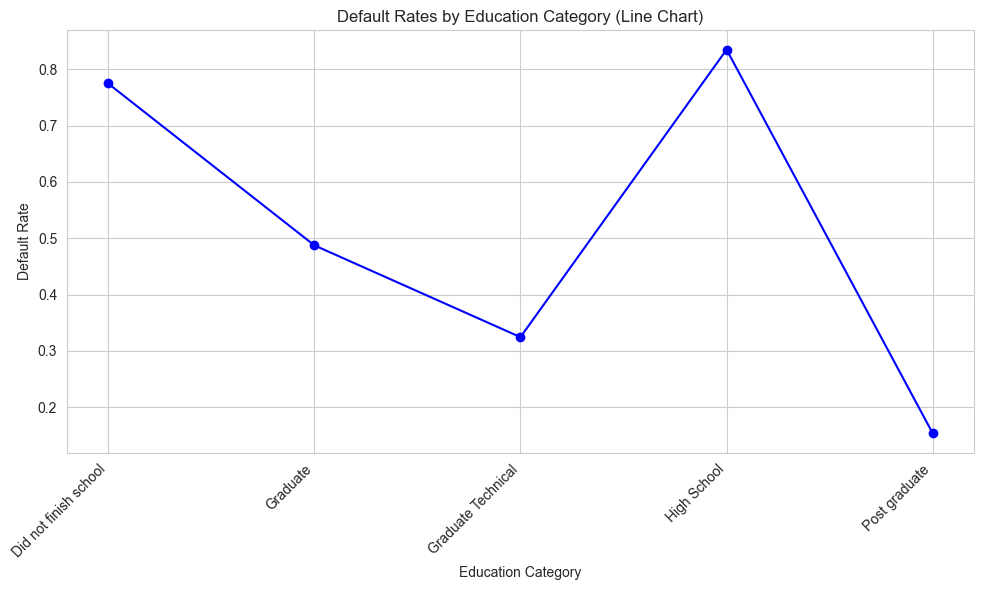

In [347]:
plt.figure(figsize=(10, 6))
plt.plot(default_rates['Education'], default_rates['Status'], marker='o', linestyle='-', color='b')
plt.xlabel('Education Category')
plt.ylabel('Default Rate')
plt.title('Default Rates by Education Category (Line Chart)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\154926224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates_occ['Occupation'],y=default_rates_occ['Status'],data=default_rates_occ,palette='husl')


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Doctor'),
  Text(1, 0, 'Government employee'),
  Text(2, 0, 'Lawyer'),
  Text(3, 0, 'Other professional'),
  Text(4, 0, 'Private sector employee'),
  Text(5, 0, 'Retired'),
  Text(6, 0, 'Self-employed'),
  Text(7, 0, 'Student')])

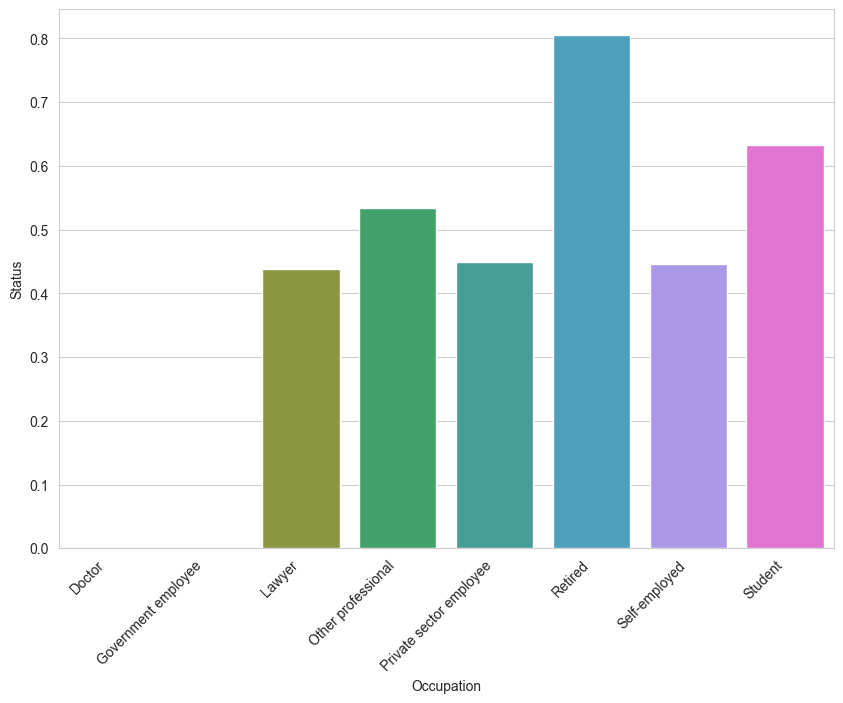

In [348]:
default_rates_occ= df.groupby('Occupation')['Status'].mean().reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x=default_rates_occ['Occupation'],y=default_rates_occ['Status'],data=default_rates_occ,palette='husl')
plt.xticks(rotation=45, ha='right') 

In [355]:
df.groupby(['Education','Occupation'])['Status'].sum().reset_index()

,Education,Occupation,Status
0,Did not finish school,Doctor,0
1,Did not finish school,Government employee,0
2,Did not finish school,Lawyer,97
3,Did not finish school,Other professional,201
4,Did not finish school,Private sector employee,98
5,Did not finish school,Retired,722
6,Did not finish school,Self-employed,91
7,Did not finish school,Student,305
8,Graduate,Doctor,0
9,Graduate,Government employee,0


In [484]:
dr_edu=df.groupby('Education')['Status'].mean().reset_index()
dr_occu=df.groupby('Occupation')['Status'].mean().reset_index()
dr_res=df.groupby('Type of residence')['Status'].mean().reset_index()

dr_rec=df.groupby('Track record with your bank')['Status'].mean().reset_index()
dr_car=df.groupby('Type of car')['Status'].mean().reset_index()

In [365]:
dr_edu.columns[0]

'Education'

C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\3426571764.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.columns[0],y='Status',data=rate,palette='husl')
C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\3426571764.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.columns[0],y='Status',data=rate,palette='husl')
C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\3426571764.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.columns[0],y='Status',data=rate,palette='husl')
C:\Users\priyam\AppData\Local\Temp\ipykerne

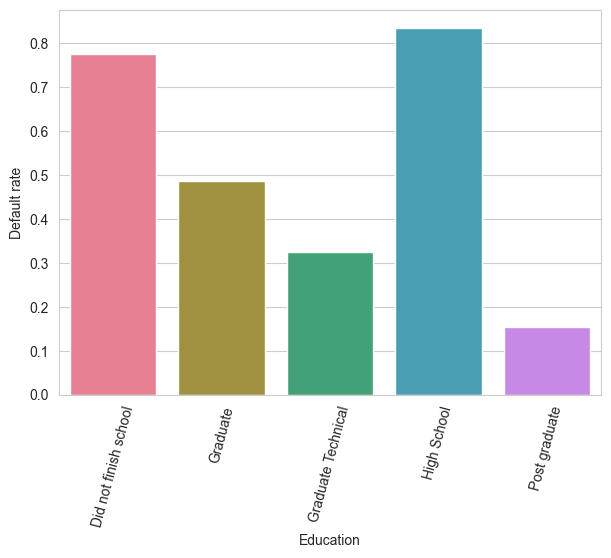

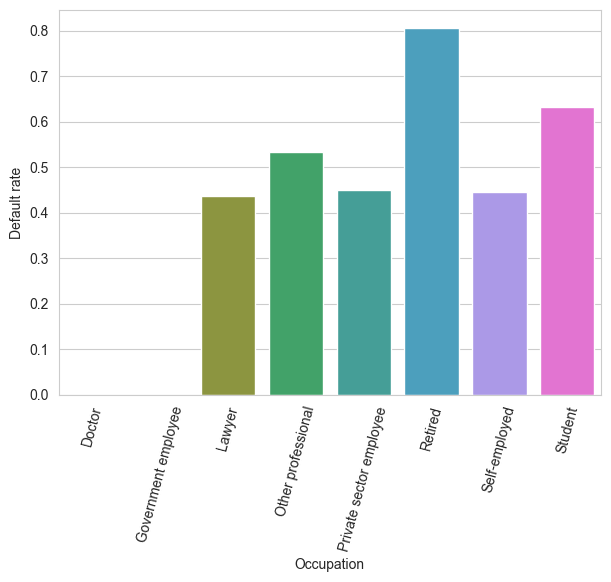

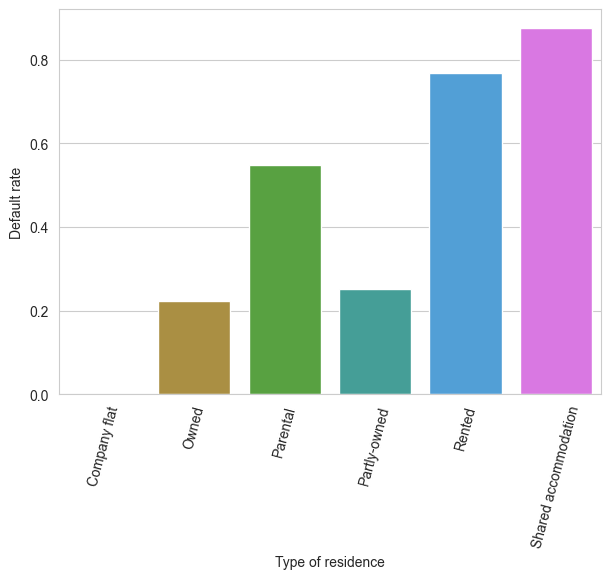

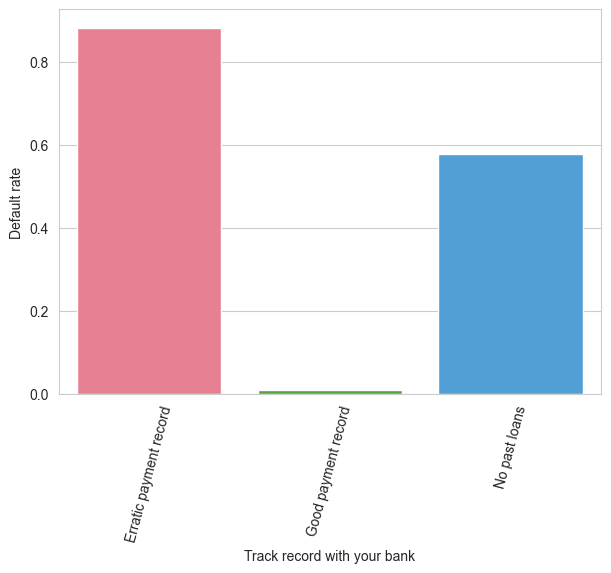

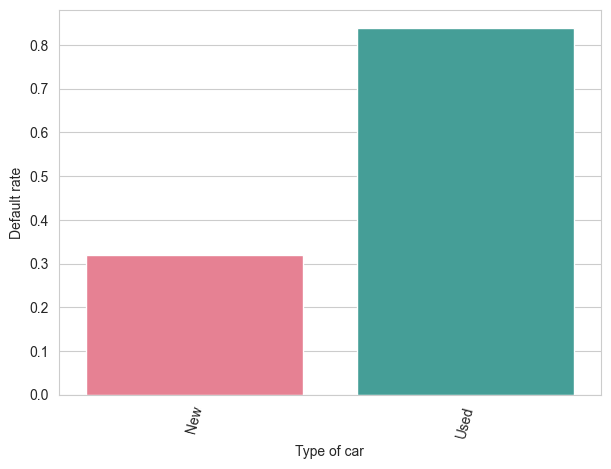

In [372]:
default_rate=[dr_edu,dr_occu,dr_res,dr_rec,dr_car]
for rate in default_rate:
    plt.figure(figsize=(7,5))
    sns.barplot(x=rate.columns[0],y='Status',data=rate,palette='husl')
    plt.xticks(rotation=75)
    plt.ylabel("Default rate")
    

C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\395488211.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=rate.columns[0],y='Status',data=rate,palette='husl')
C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\395488211.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=rate.columns[0],y='Status',data=rate,palette='husl')
C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\395488211.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=rate.columns[0],y='Status',data=rate,palette='husl')
C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\395488211.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=rate.columns[0],y='Status',data=rate,palette='husl')
C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\395488211.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns

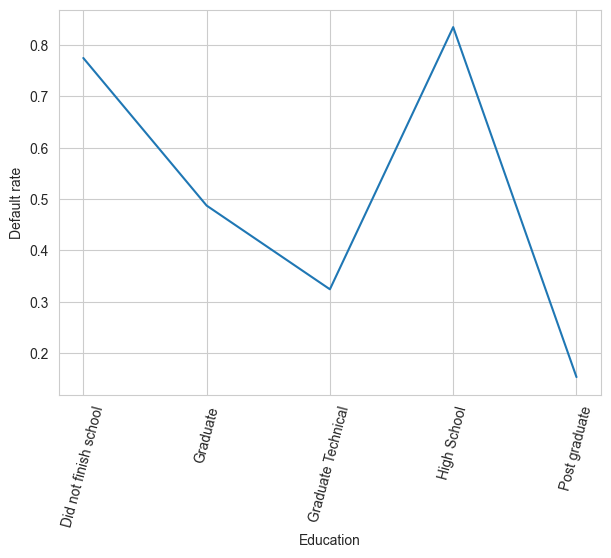

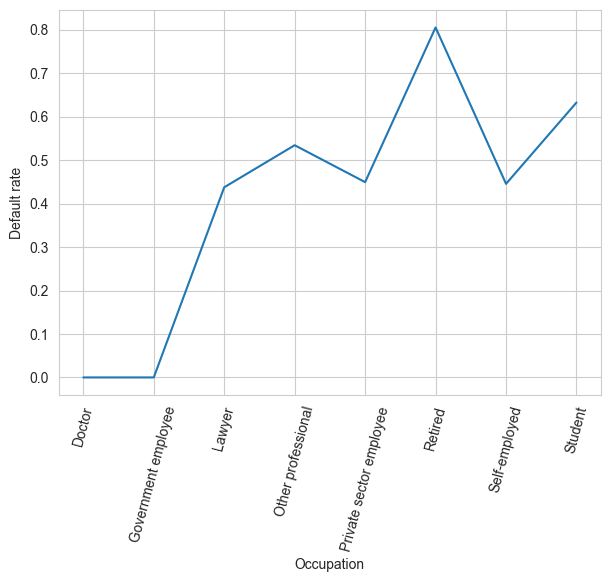

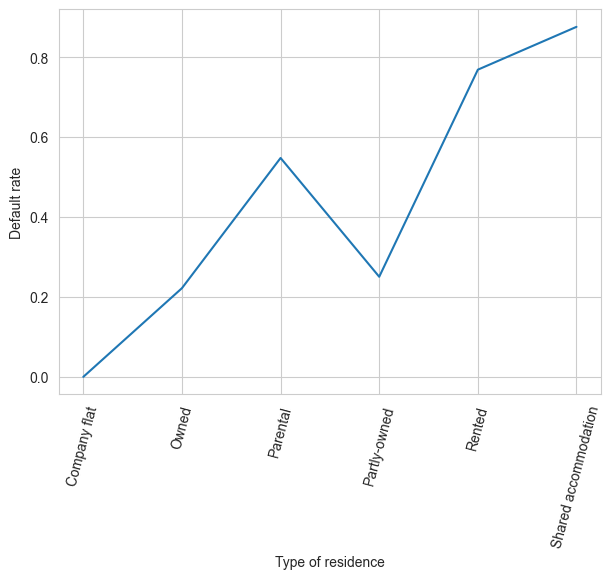

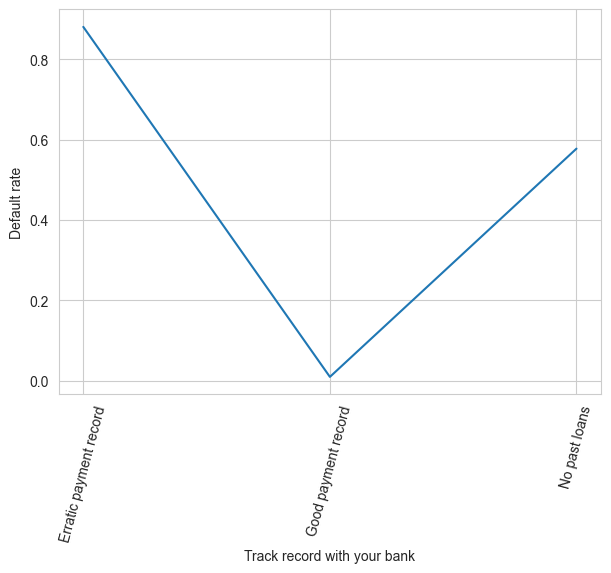

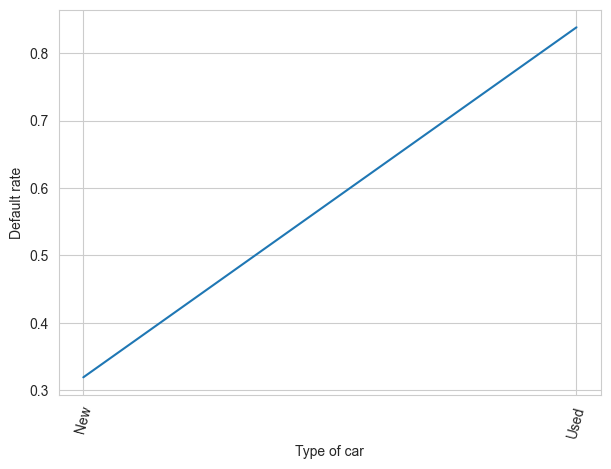

In [373]:
for rate in default_rate:
    plt.figure(figsize=(7,5))
    sns.lineplot(x=rate.columns[0],y='Status',data=rate,palette='husl')
    plt.xticks(rotation=75)
    plt.ylabel("Default rate")

In [378]:

categorical_cols=df.select_dtypes(include='object')
categorical_cols.columns

Index(['Education', 'Occupation', 'Type of residence',
       'Track record with your bank', 'Type of car'],
      dtype='object')

In [587]:

import matplotlib.pyplot as plt
import seaborn as sns

features = df.columns.tolist()

def cat_plots():
    plots=[]


    for feature in features:
        if df[feature].dtype == 'object':
            unique_values = df[feature].unique()
            feature_values_df = df[feature].value_counts()

            # Countplot
            f=plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            sns.countplot(x=feature, data=df,palette='husl')
            plt.title(f"Count of {feature}")
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.xticks(rotation=60)

            # Lineplot
            plt.subplot(1, 2, 2)
            sns.lineplot(x=unique_values, y=feature_values_df, marker='o')
            plt.title(f'Lineplot for {feature}')
            plt.xticks(rotation=60)

            plots.append(f)
    return plots  


def num_plots():
    plots1=[]
    for feature in features:
        if feature == 'Status':
            continue
        elif np.issubdtype(df[feature].dtype,np.number):
            f1=plt.figure(figsize=(10,5))
            plt.subplot(1,2,1)
            sns.boxplot(x='Status',y=feature,data=df,palette='magma')
            plt.title(f'Box plot for {feature}')

            plt.subplot(1,2,2)
            sns.histplot(x=feature,data=df,palette='magma')
            plt.title(f'Histogram for {feature}')
            plots1.append(f1)
    return plots1


def default_rate1():
    plots2=[]
    for feature in features:
        if feature=='Status':
             continue
        def_rate=df.groupby(feature)['Status'].mean().reset_index()

        f2=plt.figure(figsize=(10,5))
        sns.barplot(x=feature, y='Status',data=def_rate,palette='husl')
        plt.title(f'default rate for {feature}')
        plt.xticks(rotation=60)

        plots2.append(f2)
    return plots2    
   

            

In [ ]:
default_rate1()

In [ ]:
income_bins=[0,10,20,30,40,50,60,70,80,90,100]
income_labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

df_copy1=df.copy()

df_copy1['Income grp']=pd.cut(df_copy1['Monthly income'],bins=income_bins,labels=income_labels,right=False)


In [ ]:
df_copy1.groupby('Income grp')['Status'].mean().reset_index()

In [ ]:
loan_bins=[1000,2000,3000,4000,5000]
loan_labels=['1k-2k','2k-3k','3k-4k','4k-5k']


df_copy1['Loan grp']=pd.cut(df_copy1['Loan application amount'],bins=loan_bins,labels=loan_labels,right=False)



In [ ]:
sns.countplot(x=df_copy1['Loan grp'],palette='magma')

C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\544585281.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  def_rate_loan=df_copy1.groupby('Loan grp')['Status'].mean().reset_index()
C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\544585281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan grp',y='Status',data=def_rate_loan,palette='magma')


<Axes: xlabel='Loan grp', ylabel='Status'>

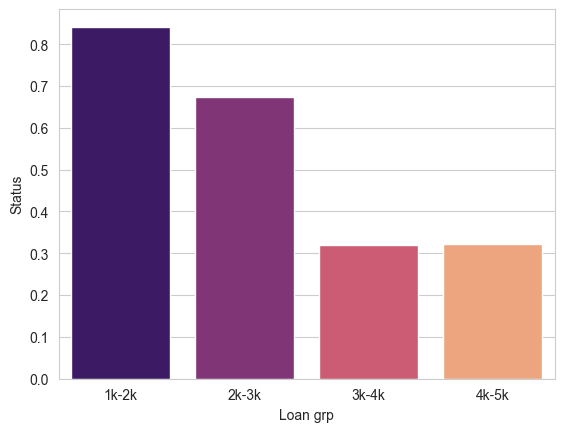

In [531]:
def_rate_loan=df_copy1.groupby('Loan grp')['Status'].mean().reset_index()
sns.barplot(x='Loan grp',y='Status',data=def_rate_loan,palette='magma')

In [532]:
collateral_bins=[1000,2000,3000,4000,5000,6000]
collateral_labels=['1k-2k','2k-3k','3k-4k','4k-5k','5k-6k']


df_copy1['Collateral grp']=pd.cut(df_copy1['Collateral'],bins=collateral_bins,labels=collateral_labels,right=False)

C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\415769618.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  def_rate_collateral=df_copy1.groupby('Collateral grp')['Status'].mean().reset_index()
C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\415769618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Collateral grp',y='Status',data=def_rate_collateral,palette='magma')


<Axes: xlabel='Collateral grp', ylabel='Status'>

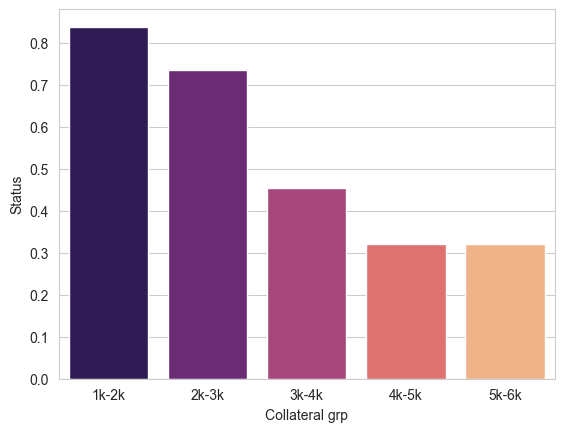

In [533]:
def_rate_collateral=df_copy1.groupby('Collateral grp')['Status'].mean().reset_index()
sns.barplot(x='Collateral grp',y='Status',data=def_rate_collateral,palette='magma')

C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\594244056.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Collateral grp',y='Status',data=def_rate_collateral,palette='magma')


<Axes: xlabel='Collateral grp', ylabel='Status'>

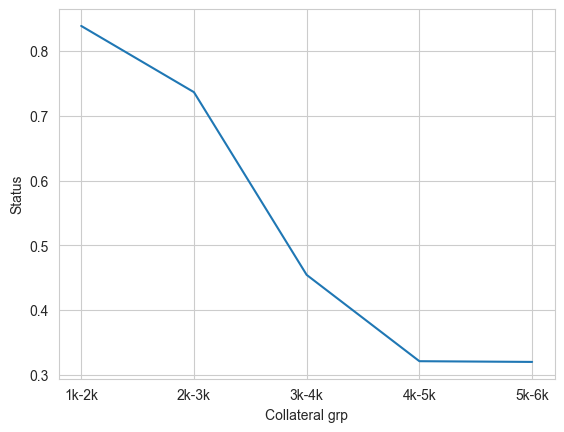

In [534]:
sns.lineplot(x='Collateral grp',y='Status',data=def_rate_collateral,palette='magma')

In [ ]:
df.

In [655]:

income_bins=[0,10,20,30,40,50,60,70,80,90,101]
income_labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-101']
loan_bins=[1000,2000,3000,4000,5000]
loan_labels=['1k-2k','2k-3k','3k-4k','4k-5k']
collateral_bins=[1000,2000,3000,4000,5000,6000]
collateral_labels=['1k-2k','2k-3k','3k-4k','4k-5k','5k-6k']
exp_bins=[0,4,8,12,16,21]
exp_label=['0-4','4-8','8-12','12-16','16-21']

df['Years in current occupation grp']= pd.cut(df['Years in current occupation' ],bins=exp_bins,labels=exp_label,right=False)
df['Income grp']=pd.cut(df['Monthly income'],bins=income_bins,labels=income_labels,right=False)
df['Loan grp']=pd.cut(df['Loan application amount'],bins=loan_bins,labels=loan_labels,right=False)
df['Collateral grp']=pd.cut(df['Collateral'],bins=collateral_bins,labels=collateral_labels,right=False)

cat_groups=['Years in current occupation grp','Income grp','Loan grp','Collateral grp']
for grp in cat_groups:
    df[grp]=df[grp].astype('object')

features = df.columns.tolist()    


def cat_plots():
    plots = []
    for selected_feature in features:
     if df[selected_feature].dtype == 'object':
        unique_values = df[selected_feature].unique()
        feature_values_df = df[selected_feature].value_counts()

        # Countplot
        f = plt.figure(figsize=(10, 5))
        plt.subplot(1,2,1)
        sns.countplot(x=selected_feature, data=df, palette='husl')
        plt.title(f"Count of {selected_feature}")
        plt.xlabel(selected_feature)
        plt.ylabel('Count')
        plt.xticks(rotation=60)
        plots.append(f)

        # Lineplot
        plt.subplot(1,2,2)
        sns.lineplot(x=unique_values, y=feature_values_df, marker='o')
        plt.title(f'Lineplot for {selected_feature}')
        plt.xticks(rotation=60)
        plots.append(f)

    return plots

def num_plots():
    plots1=[]
    for feature in features:
        if feature == 'Status':
            continue
        elif np.issubdtype(df[feature].dtype,np.number):
            f1=plt.figure(figsize=(10,5))
            plt.subplot(1,2,1)
            sns.boxplot(x='Status',y=feature,data=df,palette='magma')
            plt.title(f'Box plot for {feature}')

            plt.subplot(1,2,2)
            sns.histplot(x=feature,data=df,palette='magma')
            plt.title(f'Histogram for {feature}')
            plots1.append(f1)
    return plots1
        
def default_rate_cat():
    plots2 = []
    for selected_feature in features:
      if selected_feature != 'Status' and df[selected_feature].dtype == 'object':
        def_rate = df.groupby(selected_feature)['Status'].mean().reset_index()

        f2 = plt.figure(figsize=(10, 5))
        sns.barplot(x=selected_feature, y='Status', data=def_rate, palette='husl')
        plt.title(f'default rate for {selected_feature}')
        plt.xticks(rotation=60)
        plots2.append(f2)
    return plots2



In [664]:

num_cols.columns

Index(['Years in current occupation', 'Monthly income',
       'Loan application amount', 'Collateral', 'Status'],
      dtype='object')

In [ ]:
#result=['cat_plots()','num_plots()','default_rate_cat()']
function_names = ['cat_plots', 'num_plots', 'default_rate_cat']

# Create instances of functions
function_instances = [globals()[name] for name in function_names]

# Now function_instances is a list containing instances of your functions
# You can use them like this:
for func_instance in function_instances:
    result = func_instance()


In [674]:
def data_plots():
#Read file
    cat_cols=df.select_dtypes(include='object')
    num_cols=df.select_dtypes(exclude='object')
    plots=[]
    for i in cat_cols.columns:
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        sns.countplot(x=i, data=cat_cols, palette='husl')
        plt.title(f"Count of {i}")
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.xticks(rotation=60)

        plt.subplot(1,2,2)
        sns.lineplot(x=cat_cols[i].index,y=cat_cols[i].value_counts().values)
        plt.title(f"Count of {i}")
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.xticks(rotation=60)
        plots.append(plt)
    return plots    
    

In [708]:
def data_plots():
    # Read file
    cat_cols = df.select_dtypes(include='object')
    num_cols=  df.select_dtypes(exclude='object')
    plots = []

    for i in cat_cols.columns:
        # Create subplots
        default_rate2=df.groupby(i)['Status'].mean().reset_index()
        fig, axes = plt.subplots(1, 3, figsize=(14, 5))

        # Countplot
        sns.lineplot(x=cat_cols[i].value_counts().sort_index().index, y=cat_cols[i].value_counts().values, palette='husl', ax=axes[0])
        axes[0].set_title(f"Count of {i}")
        axes[0].set_xlabel(i)
        axes[0].set_ylabel('Count')
        axes[0].tick_params(axis='x', rotation=60)

        # Barplot showing counts
        sns.barplot(x=cat_cols[i].value_counts().sort_index().index, y=cat_cols[i].value_counts().values, ax=axes[1])
        axes[1].set_title(f"Count of {i}")
        axes[1].set_xlabel(i)
        axes[1].set_ylabel('Count')
        axes[1].tick_params(axis='x', rotation=60)

        sns.lineplot(x=i, y='Status', data= default_rate2, palette='husl', ax=axes[2])
        axes[2].set_title(f'Default Rate for {i}')
        axes[2].set_xlabel(i)
        axes[2].set_ylabel('Default Rate')
        axes[2].tick_params(axis='x', rotation=60)

        # Adjust layout
        plt.tight_layout()

        # Append the figure or axes to the list
        plots.append(fig)

    for i in num_cols.columns:
        if i == 'Status':
            continue
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        sns.boxplot(x='Status', y=i, data=df, palette='magma', ax=axes[0])
        axes[0].set_title(f"Boxplot of {i}")
        sns.histplot(x=i, data=df, palette='magma', ax=axes[1])
        axes[1].set_title(f"Histogram of {i}")

        plt.tight_layout()

        plots.append(fig)
       

    return plots


C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\2263659477.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=cat_cols[i].value_counts().sort_index().index, y=cat_cols[i].value_counts().values, palette='husl', ax=axes[0])
C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\2263659477.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=i, y='Status', data= default_rate2, palette='husl', ax=axes[2])
C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\2263659477.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=cat_cols[i].value_counts().sort_index().index, y=cat_cols[i].value_counts().values, palette='husl', ax=axes[0])
C:\Users\priyam\AppData\Local\Temp\ipykernel_2416\2263659477.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=i, y='Status', data= default_rate2, palette='husl', ax=axes[2])


[<Figure size 1400x500 with 3 Axes>,
 <Figure size 1400x500 with 3 Axes>,
 <Figure size 1400x500 with 3 Axes>,
 <Figure size 1400x500 with 3 Axes>,
 <Figure size 1400x500 with 3 Axes>,
 <Figure size 1400x500 with 3 Axes>,
 <Figure size 1400x500 with 3 Axes>,
 <Figure size 1400x500 with 3 Axes>,
 <Figure size 1400x500 with 3 Axes>,
 <Figure size 1400x500 with 2 Axes>,
 <Figure size 1400x500 with 2 Axes>,
 <Figure size 1400x500 with 2 Axes>,
 <Figure size 1400x500 with 2 Axes>]

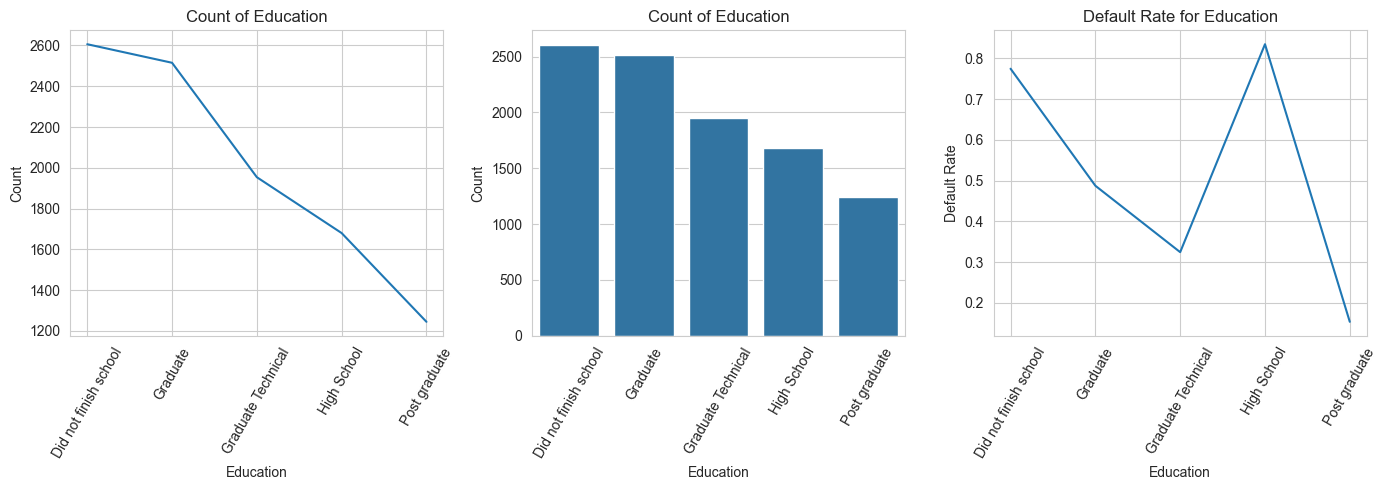

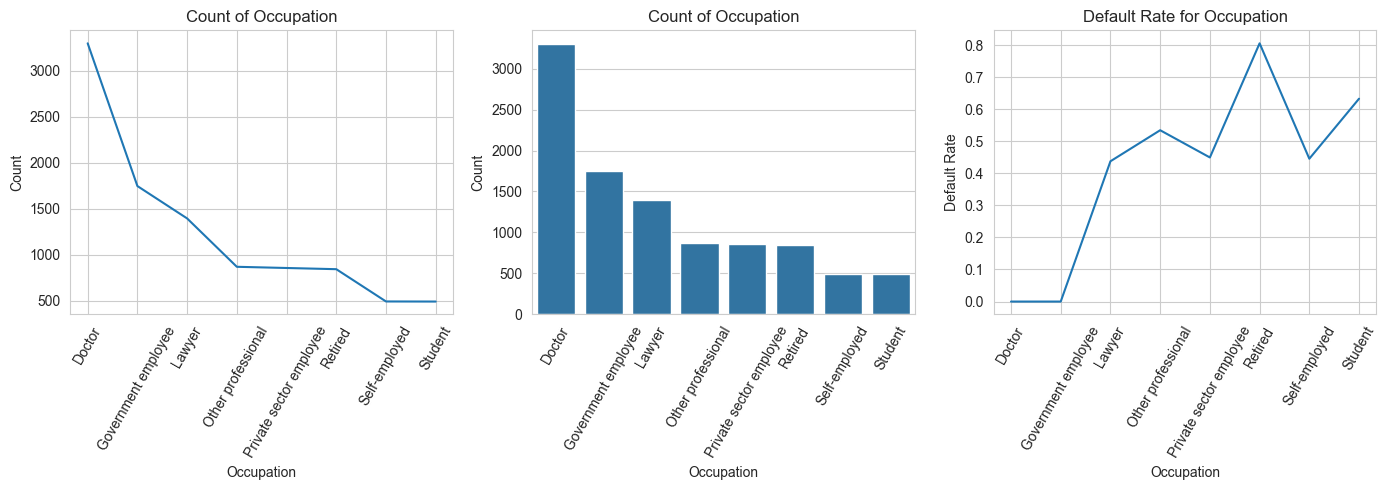

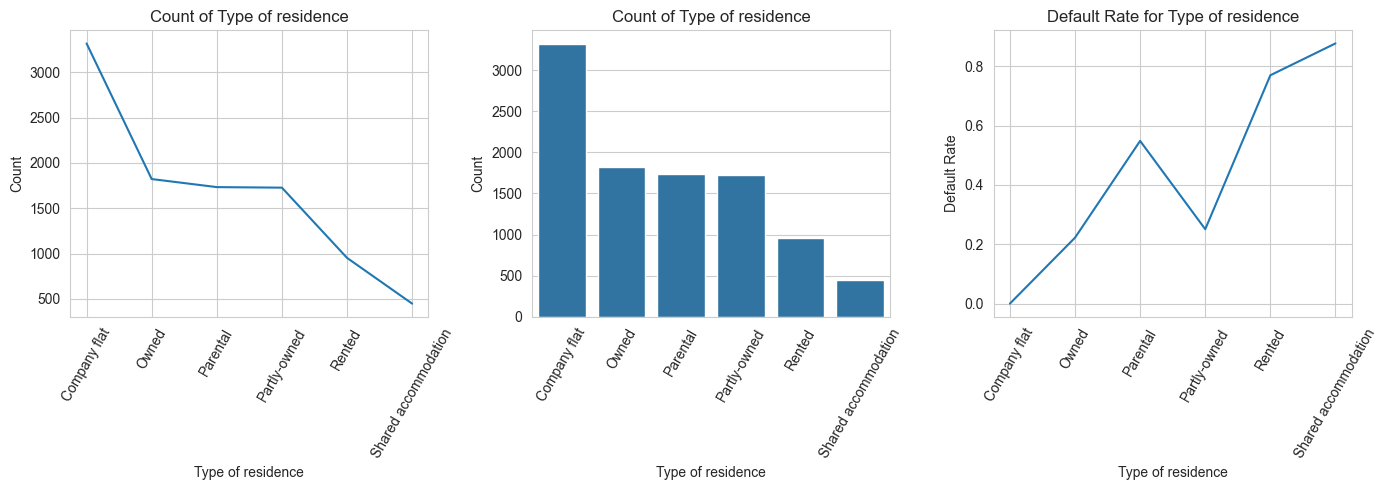

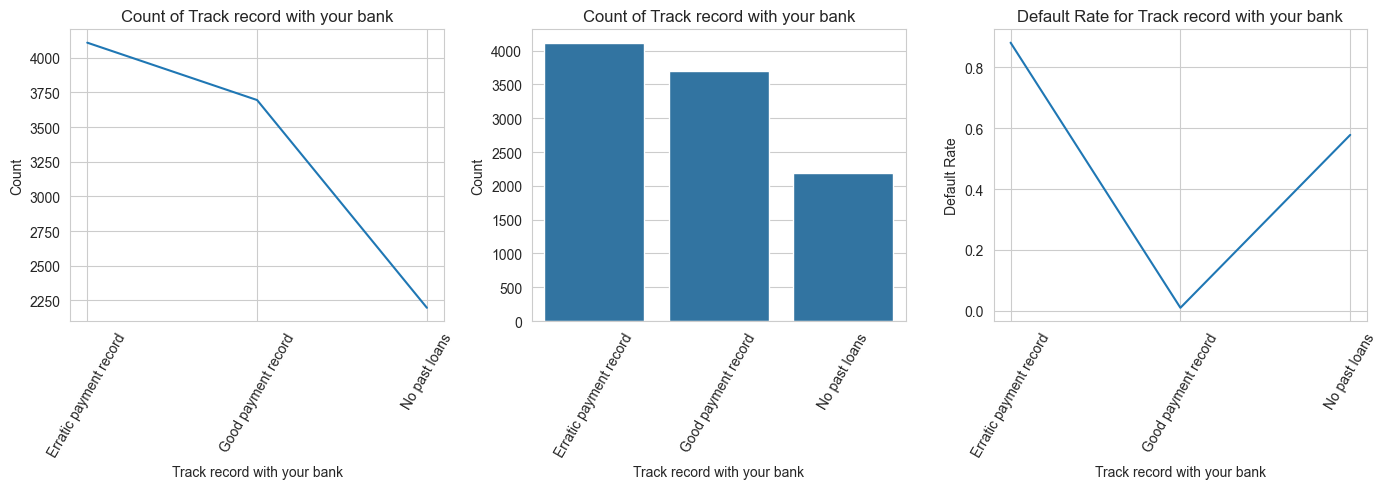

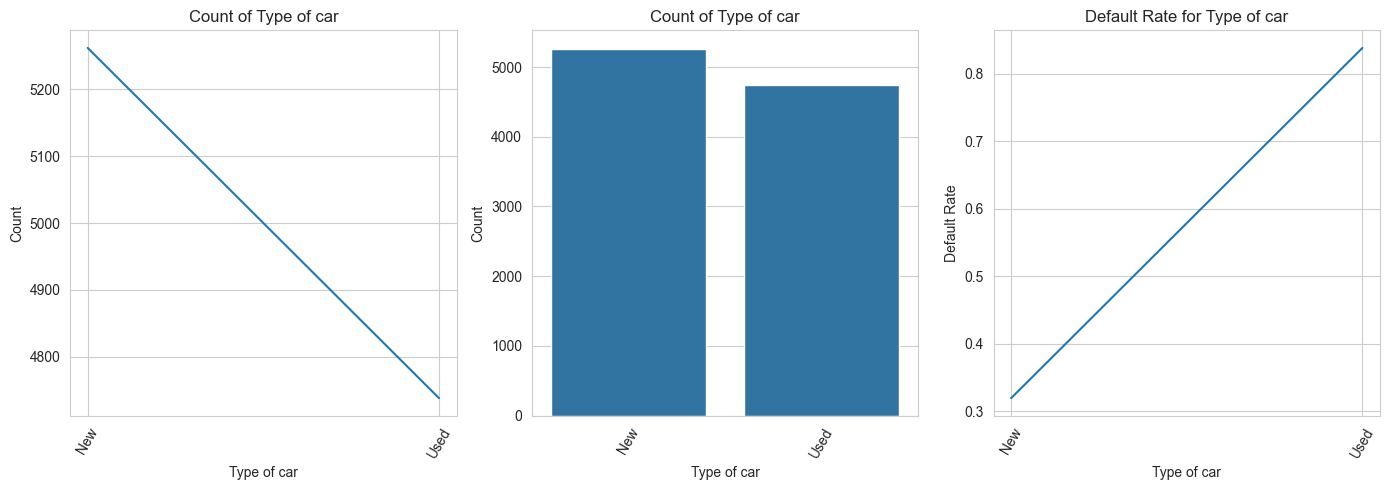

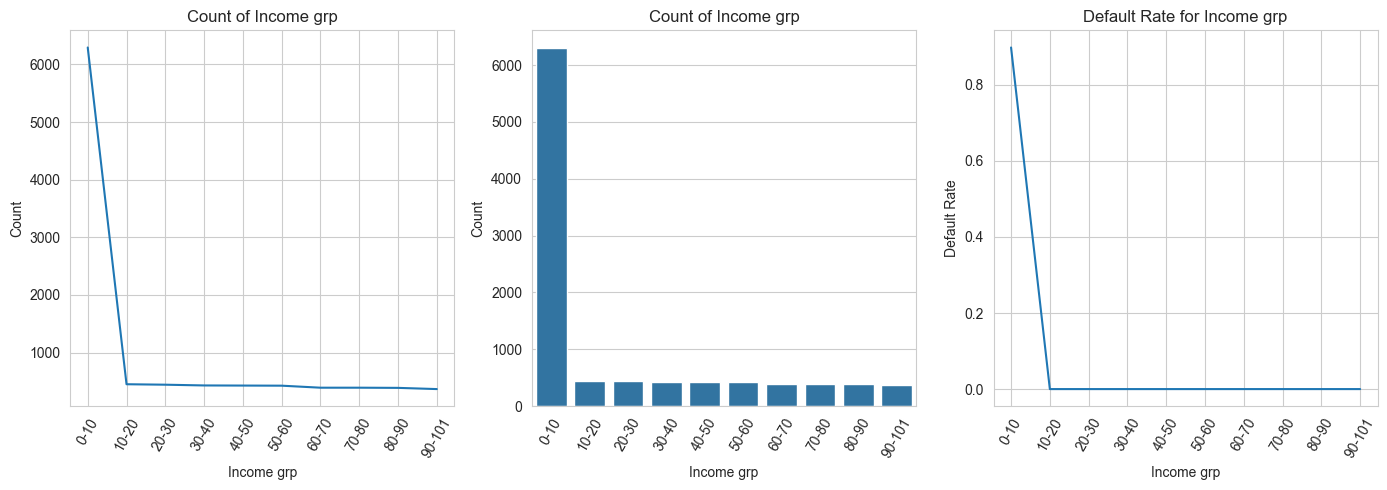

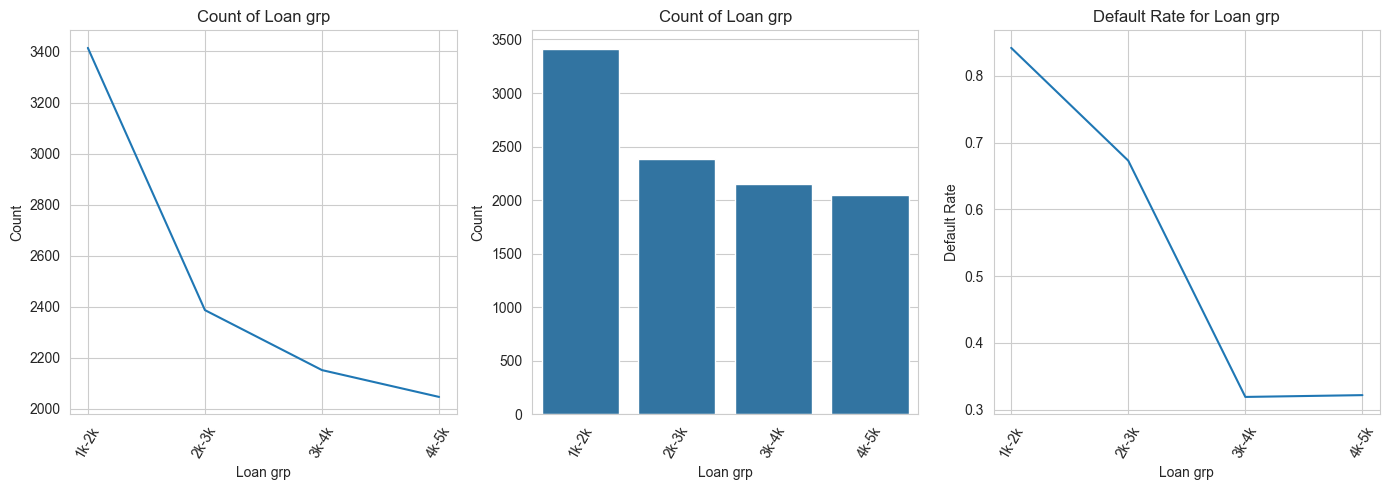

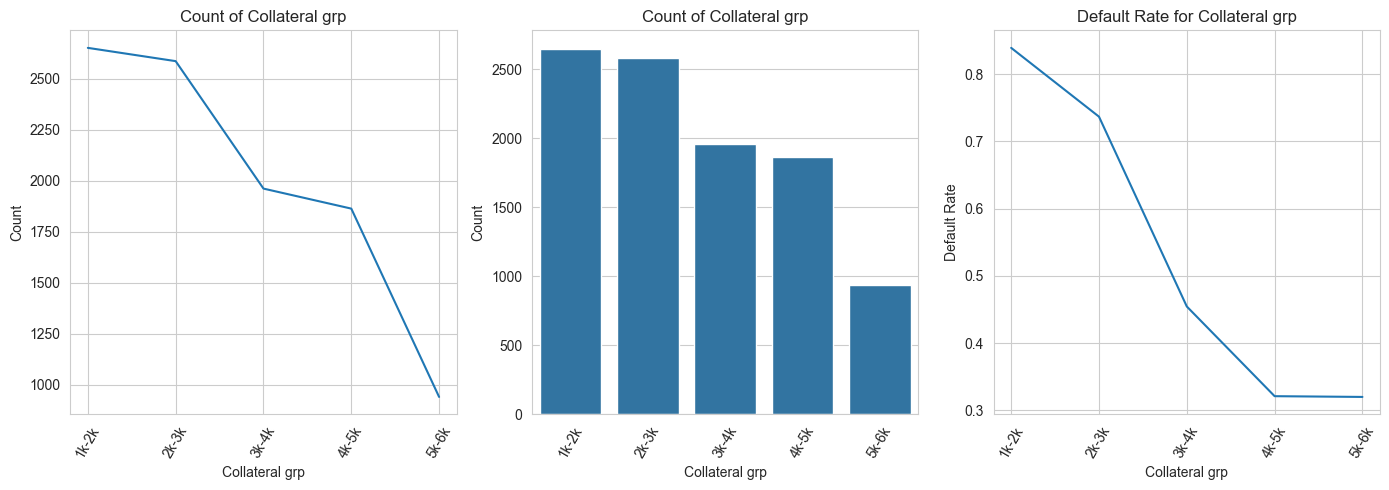

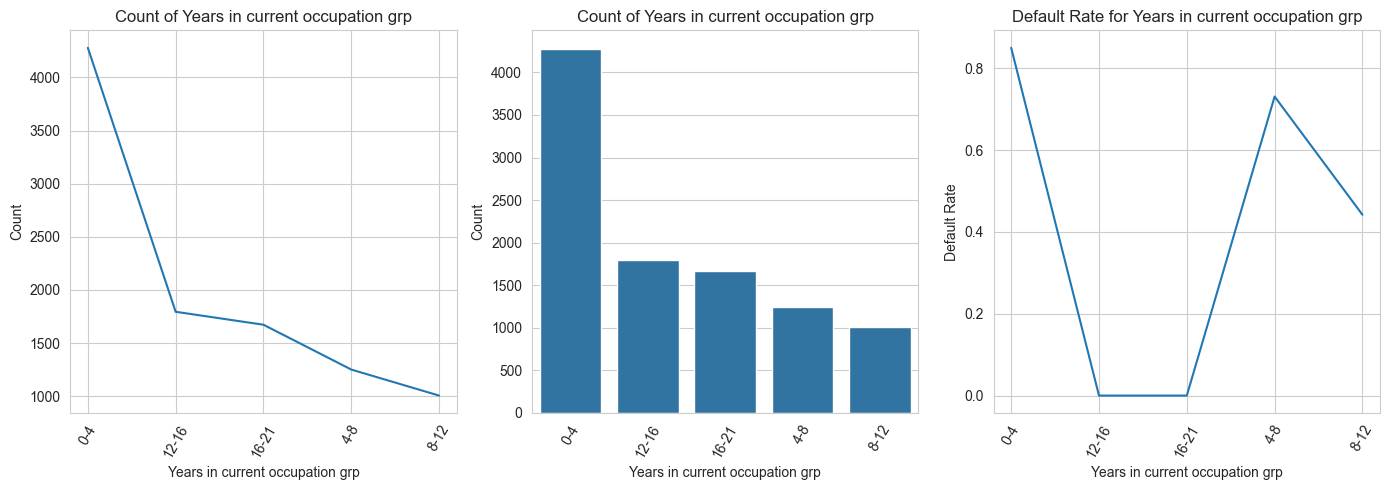

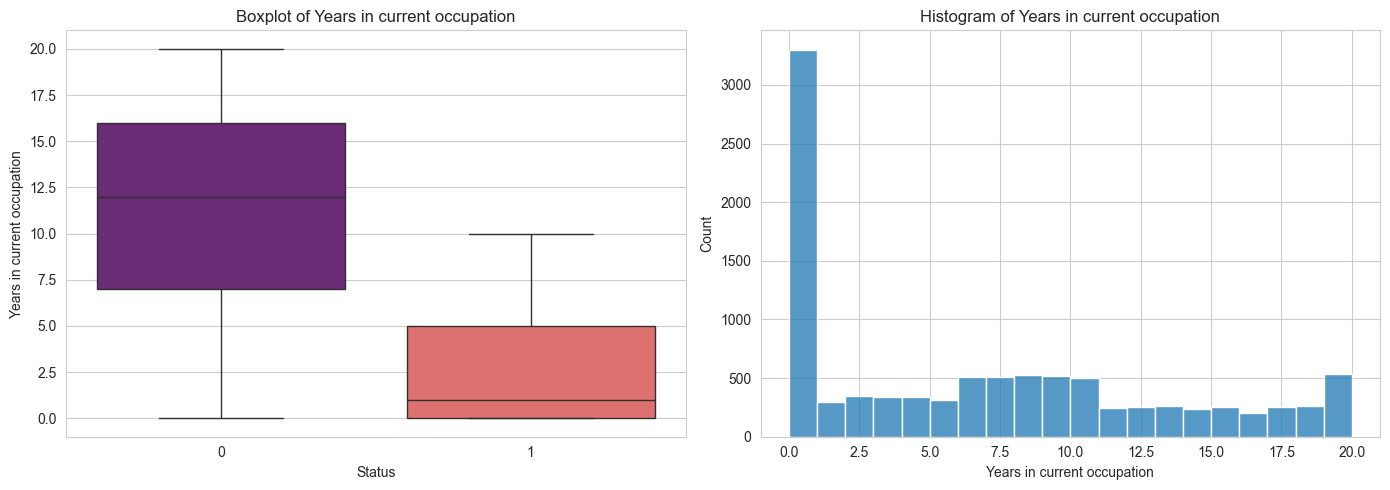

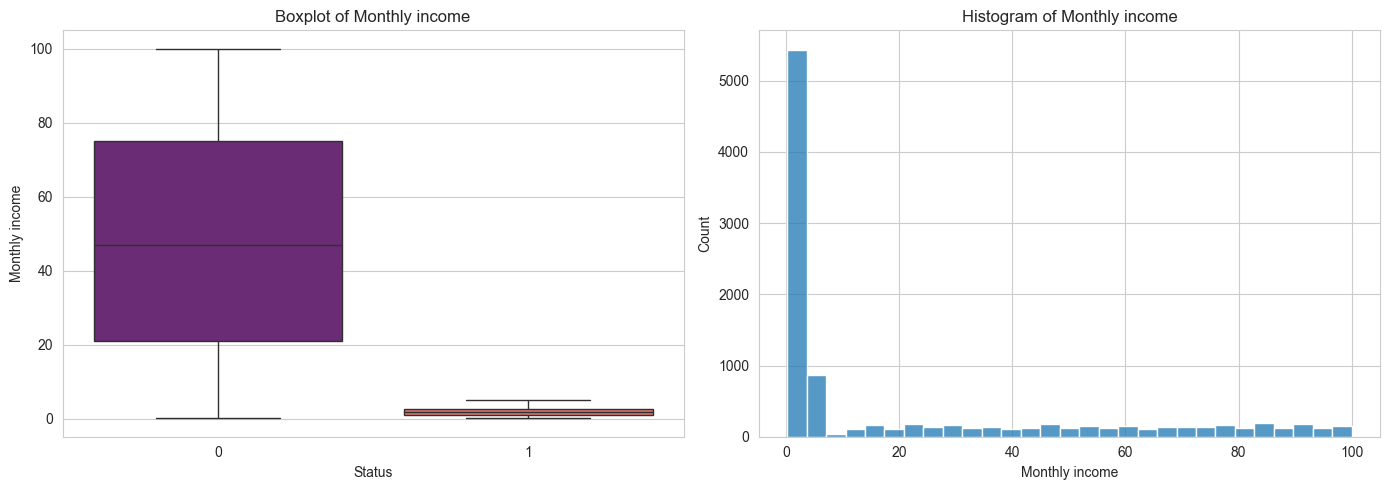

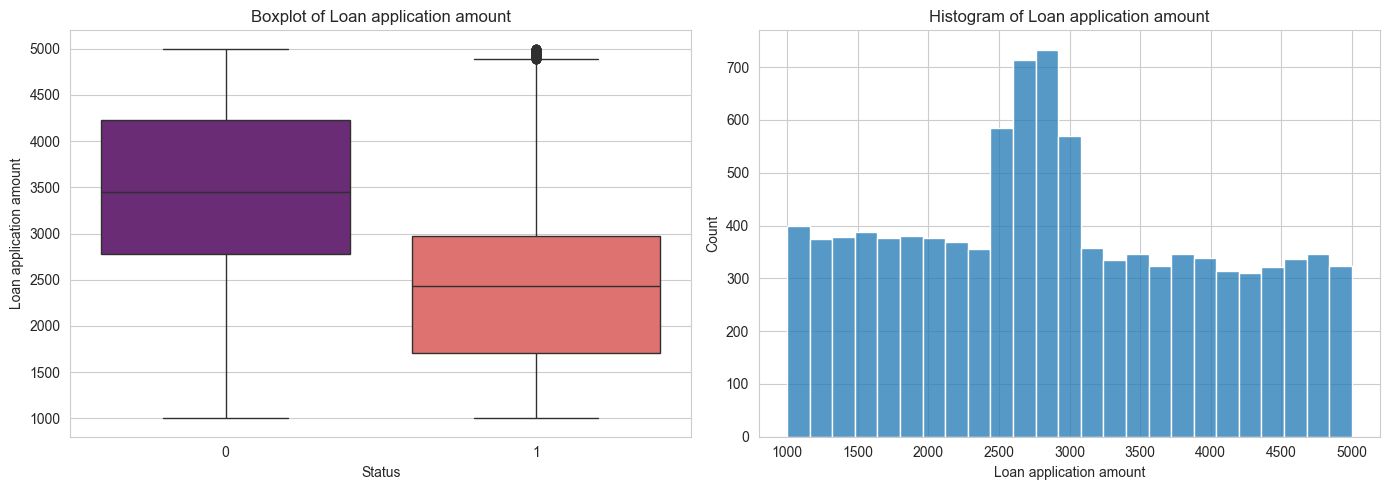

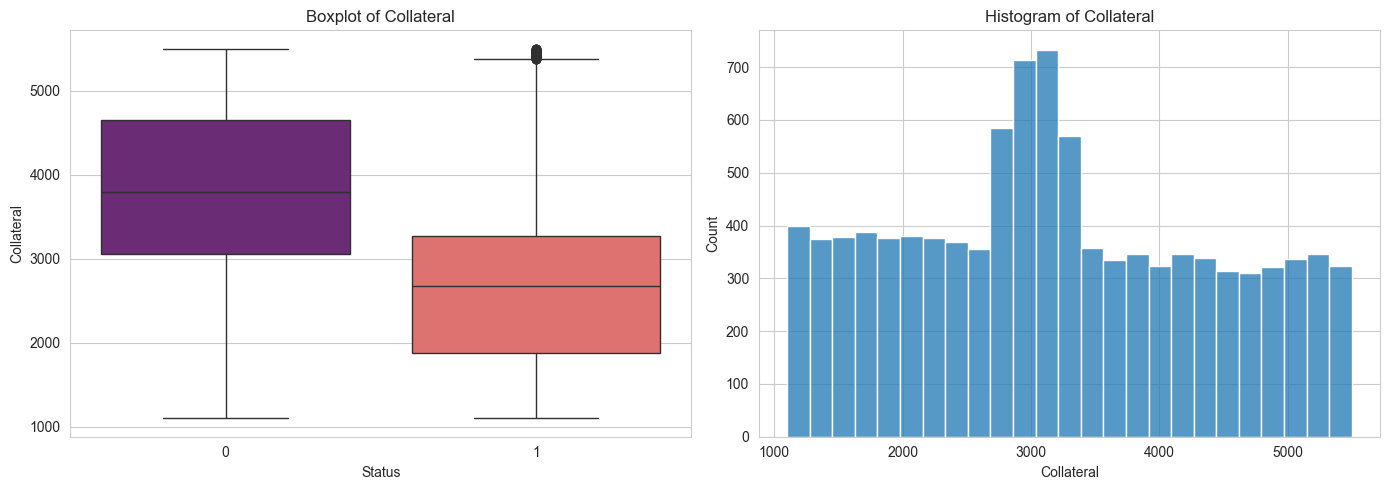

In [709]:
data_plots()

In [702]:
cat_cols=df.select_dtypes(include='object')
default_rate2=df.groupby('Income grp')['Status'].mean().reset_index()
default_rate2


,Income grp,Status
0,0-10,0.897998
1,10-20,0.000000
2,20-30,0.000000
3,30-40,0.000000
4,40-50,0.000000
5,50-60,0.000000
6,60-70,0.000000
7,70-80,0.000000
8,80-90,0.000000
9,90-101,0.000000
